In [ ]:
import pandas as pd

# import dataset
data_all = pd.read_excel('Data_Timbulan_Sampah_SIPSN_KLHK.xlsx')

In [ ]:
print(data_all)

      Tahun        Provinsi        Kabupaten/Kota  \
0      2019            Aceh     Kab. Aceh Selatan   
1      2021            Aceh     Kab. Aceh Selatan   
2      2022            Aceh     Kab. Aceh Selatan   
3      2023            Aceh     Kab. Aceh Selatan   
4      2022            Aceh    Kab. Aceh Tenggara   
...     ...             ...                   ...   
1249   2019  Sumatera Utara    Kota Tebing Tinggi   
1250   2020  Sumatera Utara    Kota Tebing Tinggi   
1251   2021  Sumatera Utara    Kota Tebing Tinggi   
1252   2022  Sumatera Utara    Kota Tebing Tinggi   
1253   2022  Sumatera Utara  Kota Padangsidimpuan   

      Timbulan Sampah Harian(ton)  Timbulan Sampah Tahunan(ton)  
0                           95.93                      35013.28  
1                           94.59                      34527.10  
2                           96.49                      35217.68  
3                           96.78                      35323.53  
4                           91.32

In [93]:
data_grouped = data_all[(data_all['Provinsi'] == 'Jawa Barat') | (data_all['Provinsi'] == 'Jawa Tengah') | (data_all['Provinsi'] == 'Jawa Timur') | (data_all['Provinsi'] == 'Banten') | (data_all['Provinsi'] == 'DKI Jakarta') | (data_all['Provinsi'] == 'D.I. Yogyakarta')].groupby([ 'Provinsi', 'Tahun'], as_index=False).sum()
data_grouped = data_grouped.drop(columns=['Kabupaten/Kota'])

In [94]:
print(data_grouped)

           Provinsi  Tahun  Timbulan Sampah Harian(ton)  \
0            Banten   2019                      6644.63   
1            Banten   2020                      3616.27   
2            Banten   2021                      2180.36   
3            Banten   2022                      7199.63   
4            Banten   2023                      4173.96   
5   D.I. Yogyakarta   2019                      2146.98   
6   D.I. Yogyakarta   2020                      1237.25   
7   D.I. Yogyakarta   2021                      1240.11   
8   D.I. Yogyakarta   2022                      1454.93   
9   D.I. Yogyakarta   2023                      1206.21   
10      DKI Jakarta   2019                      5502.86   
11      DKI Jakarta   2020                      8369.34   
12      DKI Jakarta   2021                      6450.26   
13      DKI Jakarta   2022                      8527.07   
14      DKI Jakarta   2023                      8607.27   
15       Jawa Barat   2019                      7965.46 

In [95]:
# total amount of annual waste generation
# in each province in each year

total_waste = data_grouped.groupby(['Tahun', 'Provinsi'])['Timbulan Sampah Tahunan(ton)'].sum().reset_index()
print(total_waste)

    Tahun         Provinsi  Timbulan Sampah Tahunan(ton)
0    2019           Banten                    2425292.19
1    2019  D.I. Yogyakarta                     783652.45
2    2019      DKI Jakarta                    2008546.37
3    2019       Jawa Barat                    2907389.89
4    2019      Jawa Tengah                    3662964.43
5    2019       Jawa Timur                    5413713.50
6    2020           Banten                    1319940.11
7    2020  D.I. Yogyakarta                     451594.90
8    2020      DKI Jakarta                    3054812.22
9    2020       Jawa Barat                    3430859.16
10   2020      Jawa Tengah                    4236201.24
11   2020       Jawa Timur                    3847380.64
12   2021           Banten                     795829.76
13   2021  D.I. Yogyakarta                     452637.63
14   2021      DKI Jakarta                    2354345.24
15   2021       Jawa Barat                    4510863.43
16   2021      Jawa Tengah     

In [96]:
# Average total annual waste generation
# in each province for all years

average_waste = data_grouped.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].mean().reset_index()
print(average_waste)

          Provinsi  Timbulan Sampah Tahunan(ton)
0           Banten                   1738484.502
1  D.I. Yogyakarta                    531841.040
2      DKI Jakarta                   2734347.084
3       Jawa Barat                   3768839.584
4      Jawa Tengah                   4527590.120
5       Jawa Timur                   4691367.970


In [97]:
# Province with most annual waste each year

most_annual_waste = data_grouped.loc[data_grouped.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmax()]
print(most_annual_waste)


       Provinsi  Tahun  Timbulan Sampah Harian(ton)  \
25   Jawa Timur   2019                     14832.09   
21  Jawa Tengah   2020                     11606.04   
22  Jawa Tengah   2021                     13758.60   
23  Jawa Tengah   2022                     16175.50   
29   Jawa Timur   2023                     12356.09   

    Timbulan Sampah Tahunan(ton)  
25                    5413713.50  
21                    4236201.24  
22                    5021888.22  
23                    5904061.08  
29                    4509970.46  


In [98]:
# Province with least annual waste each year
least_annual_waste = data_grouped.loc[data_grouped.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmin()]
print(least_annual_waste)

          Provinsi  Tahun  Timbulan Sampah Harian(ton)  \
5  D.I. Yogyakarta   2019                      2146.98   
6  D.I. Yogyakarta   2020                      1237.25   
7  D.I. Yogyakarta   2021                      1240.11   
8  D.I. Yogyakarta   2022                      1454.93   
9  D.I. Yogyakarta   2023                      1206.21   

   Timbulan Sampah Tahunan(ton)  
5                     783652.45  
6                     451594.90  
7                     452637.63  
8                     531052.47  
9                     440267.75  


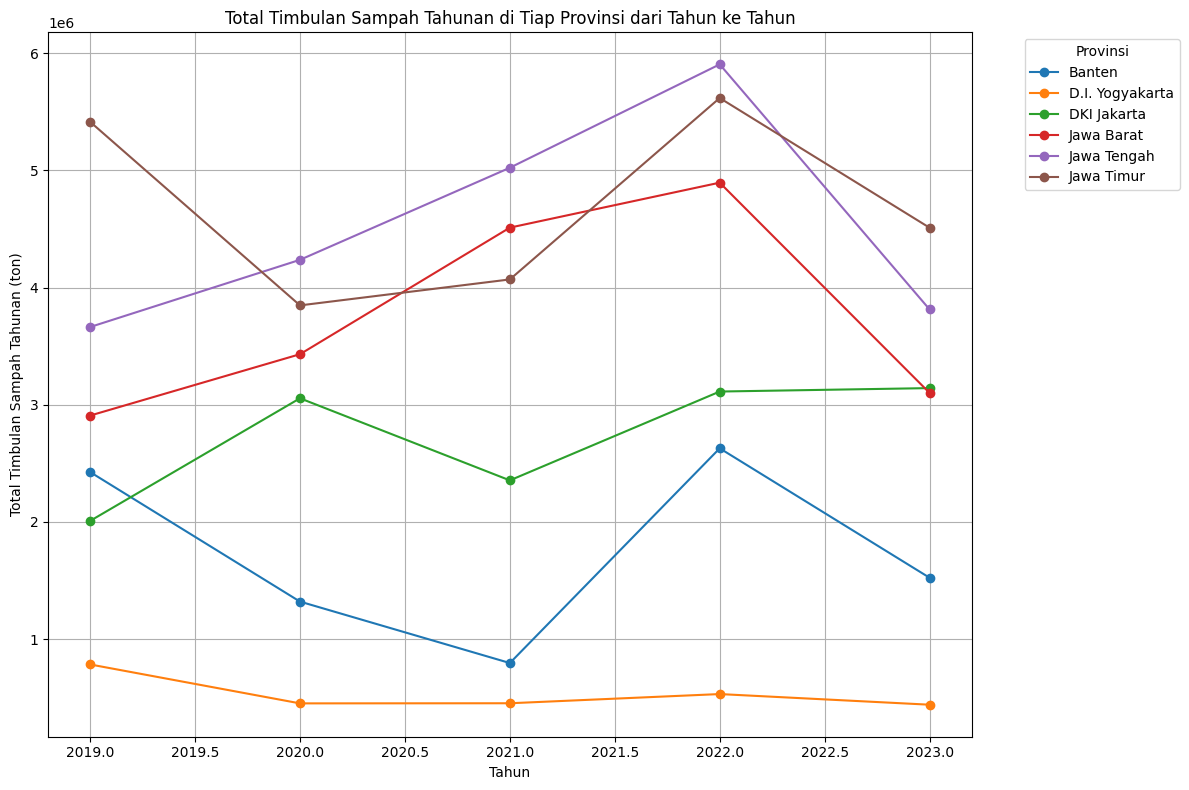

In [99]:
mport matplotlib.pyplot as plt

pivot_table = total_waste.pivot(index='Tahun', columns='Provinsi', values='Timbulan Sampah Tahunan(ton)')

plt.figure(figsize=(12, 8))
for provinsi in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[provinsi], marker='o', label=provinsi)

# plt.title('Total Timbulan Sampah Tahunan di Tiap Provinsi dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Timbulan Sampah Tahunan (ton)')
plt.legend(title='Provinsi', bbox_to_anchor=(1.05, 1), loc='upper left')

Menampilkan grid dan grafik
plt.grid(True)
plt.tight_layout()
plt.show()

,Provinsi,Timbulan Sampah Tahunan(ton),Category
0,Banten,1738484.502,RED
1,D.I. Yogyakarta,531841.040,ORANGE
2,DKI Jakarta,2734347.084,RED
3,Jawa Barat,3768839.584,RED
4,Jawa Tengah,4527590.120,RED
5,Jawa Timur,4691367.970,RED


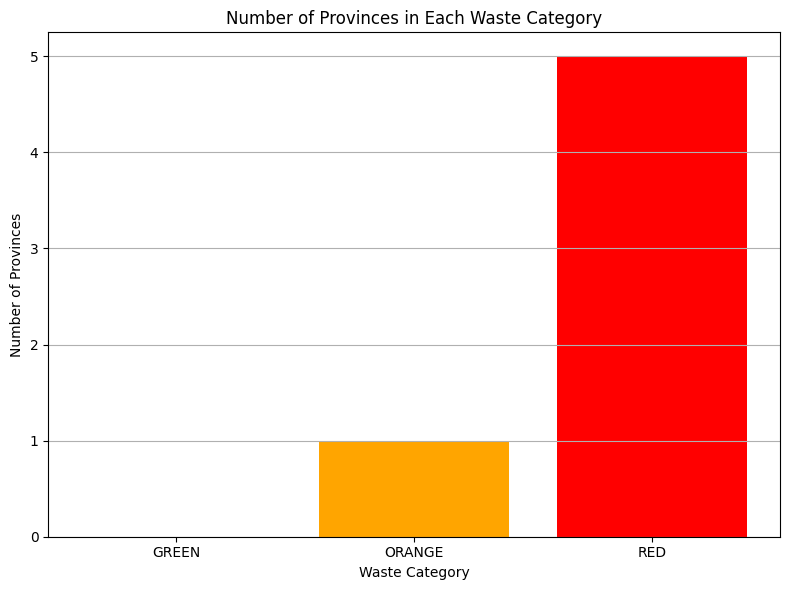

In [101]:
# Visualisasi menggunakan bar chart dengan warna sesuai kategori
colors = {'GREEN': 'green', 'ORANGE': 'orange', 'RED': 'red'}

category_counts = average_waste['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Province Count']
i
categories = ['GREEN', 'ORANGE', 'RED']
i
counts = [category_counts.loc[category_counts['Category'] == cat, 'Province Count'].values[0] if cat in category_counts['Category'].values else 0 for cat in categories]

t
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=[colors[cat] for cat in categories])

u
plt.title('Number of Provinces in Each Waste Category')
plt.xlabel('Waste Category')
plt.ylabel('Number of Provinces')
k
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [102]:
!pip3 install Flask

In [107]:
!pip install Python-IO
!pip install pybase64

In [104]:
from flask import Flask, render_template
from io import BytesIO
from io import StringIO
import base64

In [120]:
app = Flask(__name__, template_folder='template')
@app.route("/")
def dashboard():
    
    # total waste
    total_waste = data_grouped.groupby(['Tahun', 'Provinsi'])['Timbulan Sampah Tahunan(ton)'].sum().reset_index()

    average_waste = data_grouped.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].mean().reset_index()
    average_waste = average_waste.rename(columns={'Provinsi': 'Province', 'Timbulan Sampah Tahunan(ton)' : 'All Years Average Annual Waste Generation (ton)'})
    table_avg = average_waste.to_html(classes='table table-striped', index=False)
    
    most_annual_waste = data_grouped.loc[data_grouped.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmax()]
    most_annual_waste = most_annual_waste.rename(columns={'Tahun' : 'Year', 'Provinsi': 'Province', 'Timbulan Sampah Tahunan(ton)' : 'Annual Waste Generation (ton)'})
    table_most = most_annual_waste[['Year', 'Province', 'Annual Waste Generation (ton)']].to_html(classes='table table-striped', index=False)
    
    least_annual_waste = data_grouped.loc[data_grouped.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmin()]
    least_annual_waste = least_annual_waste.rename(columns={'Tahun' : 'Year', 'Provinsi': 'Province', 'Timbulan Sampah Tahunan(ton)' : 'Annual Waste Generation (ton)'})
    table_least = least_annual_waste[['Year', 'Province', 'Annual Waste Generation (ton)']].to_html(classes='table table-striped', index=False)
    
    
    
    pivot_table = total_waste.pivot(index='Tahun', columns='Provinsi', values='Timbulan Sampah Tahunan(ton)')
    plt.figure(figsize=(12, 8))
    for provinsi in pivot_table.columns:
        plt.plot(pivot_table.index, pivot_table[provinsi], marker='o', label=provinsi)

    plt.title('Annual Waste Generation in Each Province by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Annual Waste Generation (ton)')
    plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True)
    plt.tight_layout()

    img_1 = StringIO()
    plt.savefig('static/images/plot1.png')
    
    
    # Average waste generation category
    average_waste['Category'] = average_waste['All Years Average Annual Waste Generation (ton)'].apply(categorize_waste)
    
    colors = {'GREEN': 'green', 'ORANGE': 'orange', 'RED': 'red'}

    category_counts = average_waste['Category'].value_counts().reset_index()
    category_counts.columns = ['Category', 'Province Count']

    # Definisikan label dan urutan kategori
    categories = ['GREEN', 'ORANGE', 'RED']

    # Menyimpan jumlah provinsi untuk setiap kategori
    counts = [category_counts.loc[category_counts['Category'] == cat, 'Province Count'].values[0] if cat in category_counts['Category'].values else 0 for cat in categories]

    # Visualisasi menggunakan bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(categories, counts, color=[colors[cat] for cat in categories])

    # Menambahkan judul dan label sumbu
    plt.title('Number of Provinces in Each Waste Category')
    plt.xlabel('Waste Category')
    plt.ylabel('Number of Provinces')

    plt.grid(axis='y')
    plt.tight_layout()

    img_2 = StringIO()
    plt.savefig('static/images/plot2.png')
    
    
    return render_template('index.html', annual_path = 'static/images/plot1.png',  average_path = 'static/images/plot2.png', tab1 = table_avg, tab2 = table_most, tab3 = table_least)

def categorize_waste(waste):
    if waste <= 100000:
        return 'GREEN'
    elif 100000 < waste <= 700000:
        return 'ORANGE'
    else:
        return 'RED'


app.run()
    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/Jul/2024 22:53:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jul/2024 22:53:44] "GET /static/images/plot1.png HTTP/1.1" 200 -
127.0.0.1 - - [07/Jul/2024 22:53:44] "GET /static/images/plot2.png HTTP/1.1" 200 -
